## **Time Series Forecasting**
Creating a time series model that helps your predict future value of atime series after abserving previos data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [44]:
daily_revenue = pd.read_csv('Final_data.csv')
daily_revenue.set_index('Date',inplace=True)
daily_revenue.head()

,Revenue
Date,
2010-12-01,46051.26
2010-12-02,45775.43
2010-12-03,22598.46
2010-12-05,31380.60
2010-12-06,30465.08


#### **Plots**

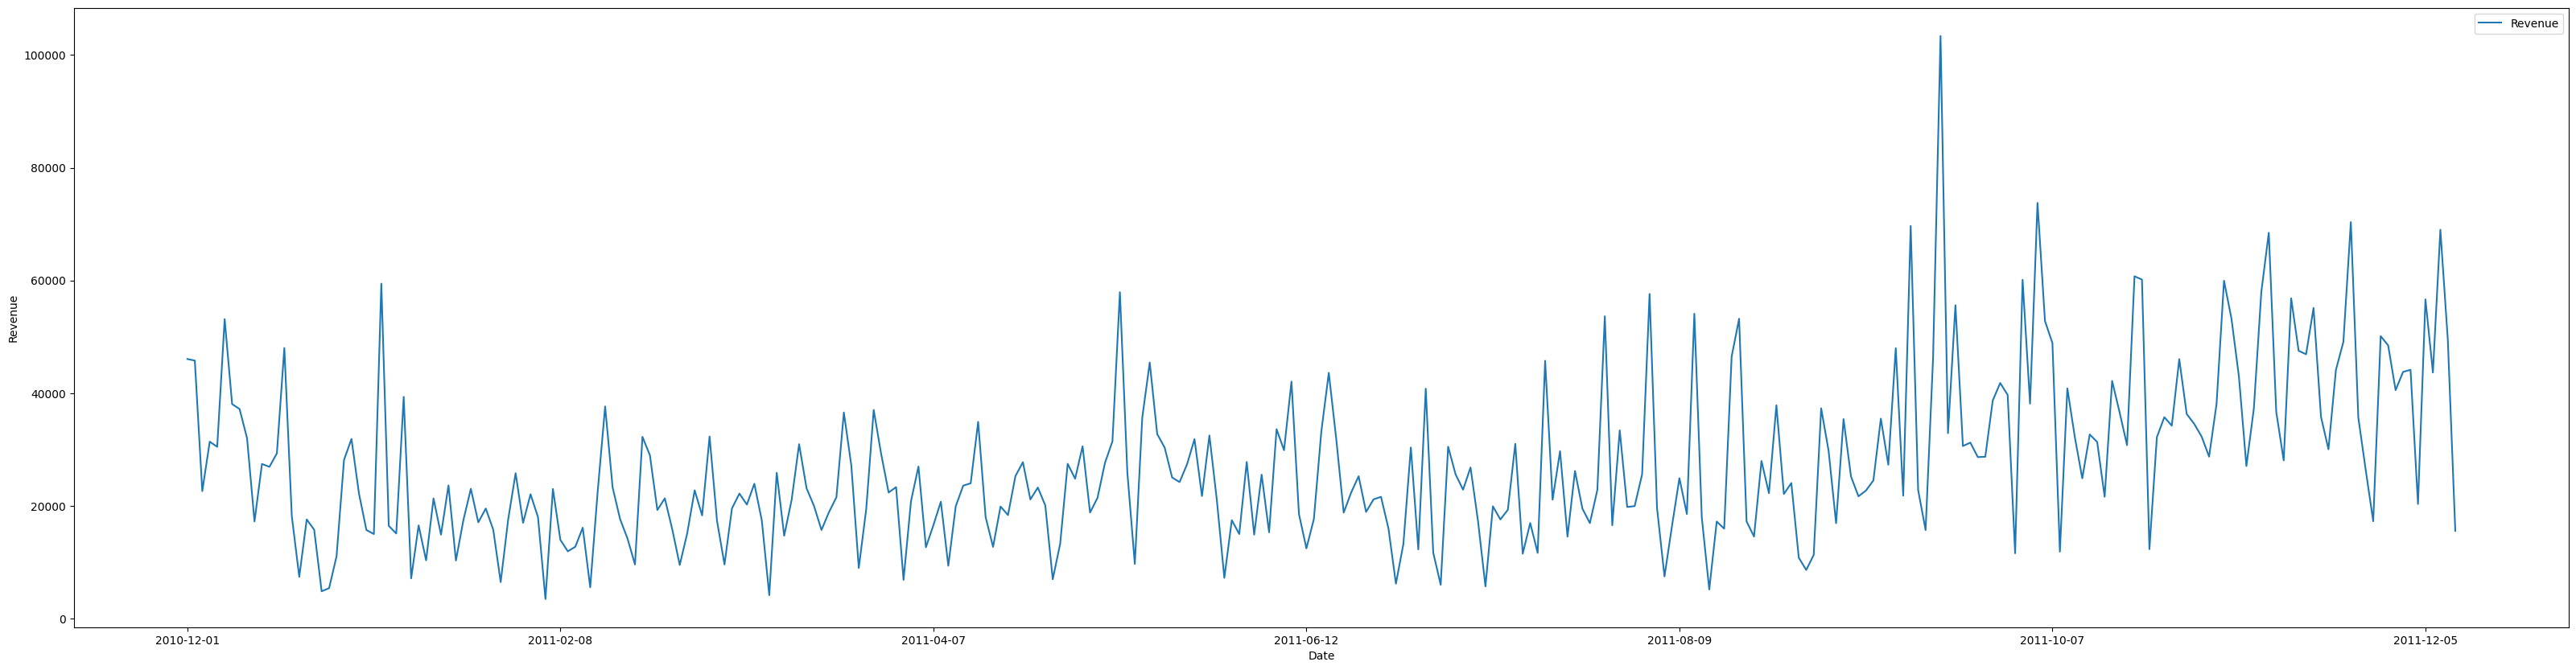

In [6]:
#line Plot for Daily revenue
daily_revenue.plot(figsize=(40,10))
#plt.savefig('daily_revenue_Graph.jpg')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

##### **By observing the plot., it looks data is stationary., but we do some statistical methods to prove that**

#### **Moving Averages**

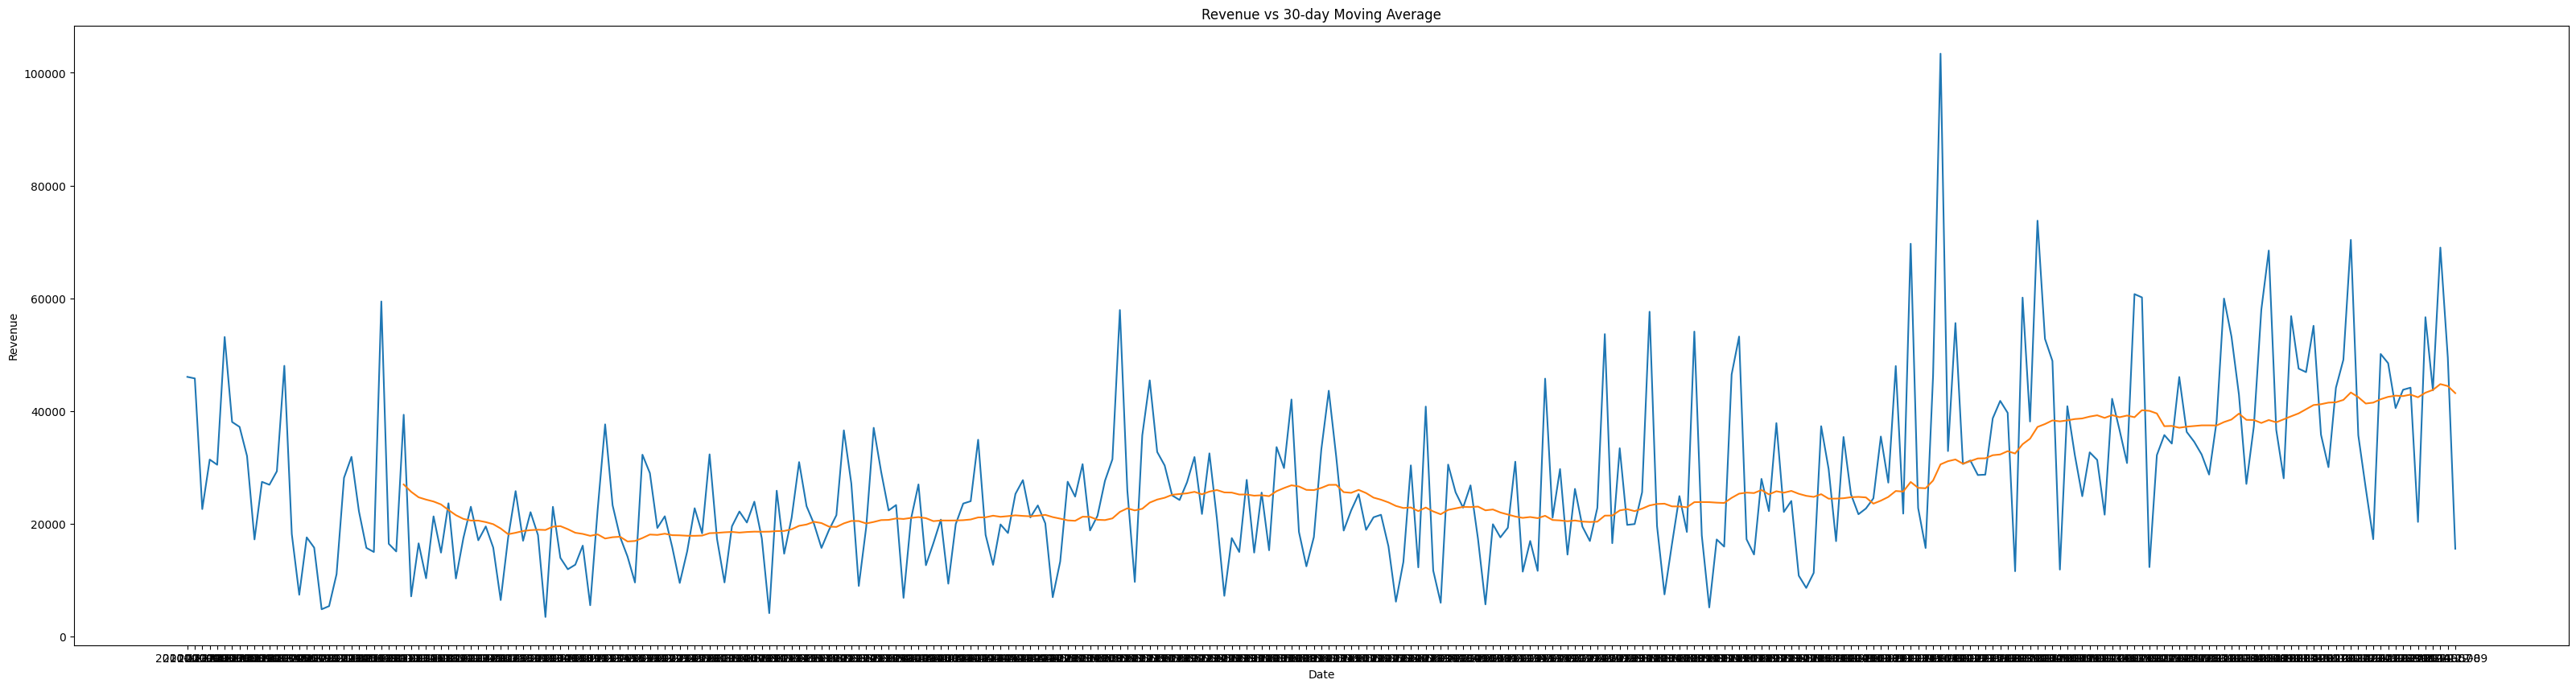

In [7]:
#30 day moving average
daily_revenue_ma=daily_revenue.copy()
daily_revenue_ma['30-day MA']=daily_revenue['Revenue'].rolling(window=30).mean()

#Plotting
plt.figure(figsize=(40,10))
plt.plot(daily_revenue_ma['Revenue'],label='Original data')
plt.plot(daily_revenue_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Revenue vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
#plt.savefig('30_Day_moving_Avg.jpg')
plt.show()

##### **There is no seasonality in the Plot**
we may procedd eith **ARIMA**

#### **Testing For Stationary**
In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time . It does not mean that the series does not change over time, just that the way it changes does not itself change over time.


##### ***Augmented Dicky_Fuller Test*** for Stationarity

H0 ---> (Null Hypothesis) --> Data is Not Stationary   
H1 ---> (Alternate Hypothesis) --> Data is Stationary

In [8]:
from statsmodels.tsa.stattools import adfuller


In [9]:
test_result=adfuller(daily_revenue['Revenue'])

In [10]:
  """
  This function performs the Dickey-Fuller test for stationarity on the provided time series.

  Args:
    timeseries: A Pandas Series or NumPy array containing the time series data.

  Returns:
    A tuple containing the test statistic, p-value, number of lags used, and number of observations used.
  """

test_result=adfuller(daily_revenue['Revenue'])
# Creating a function for Ststionarity

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(revenue):
    result=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis(H0). Data has no unit root and is stationary, H1 Accepted")
    else:
        print("weak evidence against null hypothesis(H0), time series has a unit root, indicating it is non-stationary, (H0) Accepeted ")


In [11]:
adfuller_test(daily_revenue['Revenue'])

ADF Test Statistic : -1.2372577321685478
p-value : 0.6573666283620446
#Lags Used : 12
Number of Observations Used : 292
weak evidence against null hypothesis(H0), time series has a unit root, indicating it is non-stationary, (H0) Accepeted 


##### **Making Data Stationary**

we have **Time Shift**, **Log**,**Square Root**,**Cubing** these are the methods are there in order to make our Data Stationary

In [12]:
# code for making my data stationary ----> Using Time Shift method

# Making the data stationary
daily_revenue_stationary = daily_revenue.copy()
daily_revenue_stationary['Revenue First Difference'] = daily_revenue_stationary['Revenue'] - daily_revenue_stationary['Revenue'].shift(1)
#daily_revenue_stationary['Revenue Second Difference'] = daily_revenue_stationary['Revenue First Difference'] - daily_revenue_stationary['Revenue First Difference'].shift(1)

# Removing NaN values
daily_revenue_stationary.dropna(inplace=True)

# Testing for stationarity
adfuller_test(daily_revenue_stationary['Revenue First Difference'])


ADF Test Statistic : -9.33723295290105
p-value : 8.994363846938383e-16
#Lags Used : 11
Number of Observations Used : 292
strong evidence against the null hypothesis(Ho), reject the null hypothesis(H0). Data has no unit root and is stationary, H1 Accepted


For First shift only we got data as stationary

In [13]:
daily_revenue_stationary.head()

,Revenue,Revenue First Difference
Date,,
2010-12-02,45775.43,-275.83
2010-12-03,22598.46,-23176.97
2010-12-05,31380.60,8782.14
2010-12-06,30465.08,-915.52
2010-12-07,53125.99,22660.91


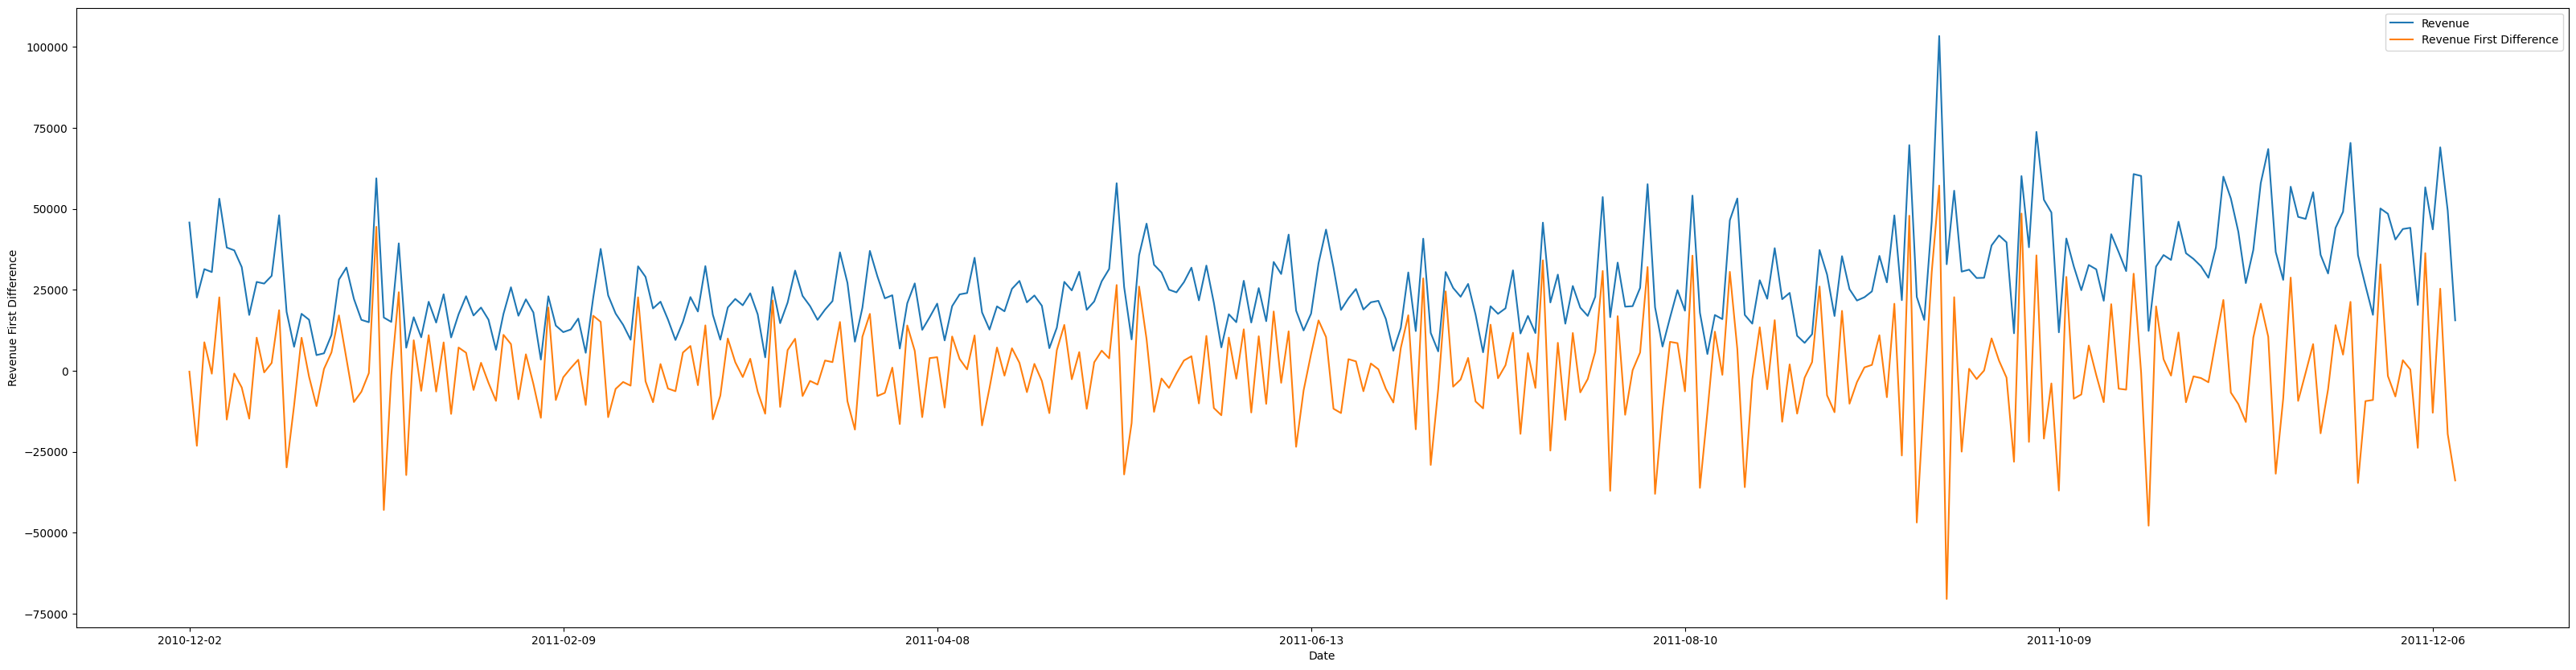

In [14]:
#line Plot for Daily revenue
daily_revenue_stationary.plot(figsize=(40,10))
#plt.savefig('daily_revenue_Stationary_Graph.jpg')
plt.xlabel('Date')
plt.ylabel('Revenue First Difference')
plt.show()

### Final Thoughts on **Autocorrelation and Partial Autocorrelation**

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q                                      
    p --> AR model lags                                    
    d --> differencing                                        
    q --> MA lags

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

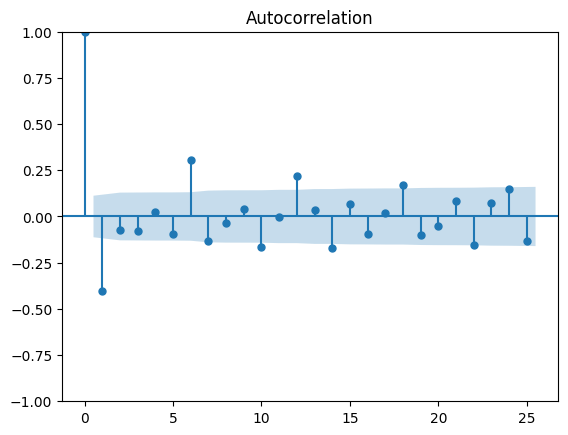

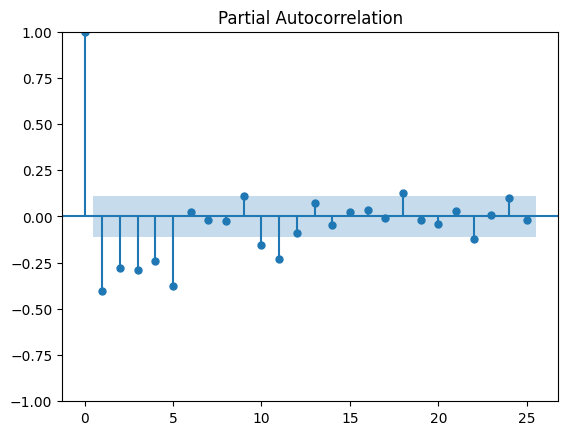

In [16]:
# plotting acf and pacf
import matplotlib.pyplot as plt

# Plot the ACF and PACF of the first-differenced data
plot_acf(daily_revenue_stationary['Revenue First Difference'])
plt.show()
plot_pacf(daily_revenue_stationary['Revenue First Difference'])
plt.show()


Shaded area --> In Significant Area,
Non-Shaded Area --> Significant Area


For Choosing **P value** .,, we have to go with **Partial auto correlation plot**., **1st exceeding Shaded area.., so P=1,2,3,4,5**

For Choosing **q value** .,, we have to go with  **Auto correlation plot**., **1st exceeding Shaded area., so Q=1**

We done **Time Shift = 1**., so My d value **d=1**

## **ARIMA MODEL**

Making last 30 days as my test Data and remaining as Train Data

In [17]:
print(daily_revenue_stationary.shape)
train_data,test_data=daily_revenue_stationary[1:-30],daily_revenue_stationary[-30:]
print(train_data.shape,test_data.shape)
train_data.head()

(304, 2)
(273, 2) (30, 2)


,Revenue,Revenue First Difference
Date,,
2010-12-03,22598.46,-23176.97
2010-12-05,31380.60,8782.14
2010-12-06,30465.08,-915.52
2010-12-07,53125.99,22660.91
2010-12-08,38048.68,-15077.31


##### **Training the Model**

In [18]:
# Training the model
#Stationary Data is Useful for Finding P,Q,D values
#Fitting the model with regular Revenue
from statsmodels.tsa.arima.model import ARIMA
#order=(p,d,q)
model = ARIMA(train_data['Revenue'],order=(5,1,1))
#model = ARIMA(train_data['Revenue'],order=(3,1,1))
model = model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  273
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2945.348
Date:                Thu, 11 Jul 2024   AIC                           5904.697
Time:                        07:19:41   BIC                           5929.938
Sample:                             0   HQIC                          5914.830
                                - 273                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7616      0.185     -4.115      0.000      -1.124      -0.399
ar.L2         -0.6959      0.136     -5.132      0.000      -0.962      -0.430
ar.L3         -0.6163      0.106     -5.804      0.000      -0.824      -0.408
ar.L4         -0.4911      0.096     -5.114      0.000      -0.679      -0.303
ar.L5         -0.3961      0.056     -7.058      0.000      -0.506      -0.286
ma.L1         -0.0150      0.201     -0.075      0.940      -0.409       0.379
sigma2      1.462e+08    1.9e-09    7.7e+16      0.000    1.46e+08    1.46e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               125.46
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+32. Standard errors may be unstable.
"""

##### **Making Predictions**

In [19]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
Test_predictions = model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
#Printing Date also
Test_predictions.index = daily_revenue_stationary.index[start:end+1]
#print(Test_predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [20]:
daily_revenue_stationary.tail()

,Revenue,Revenue First Difference
Date,,
2011-12-05,56634.53,36314.22
2011-12-06,43659.20,-12975.33
2011-12-07,68991.27,25332.07
2011-12-08,49442.19,-19549.08
2011-12-09,15560.21,-33881.98


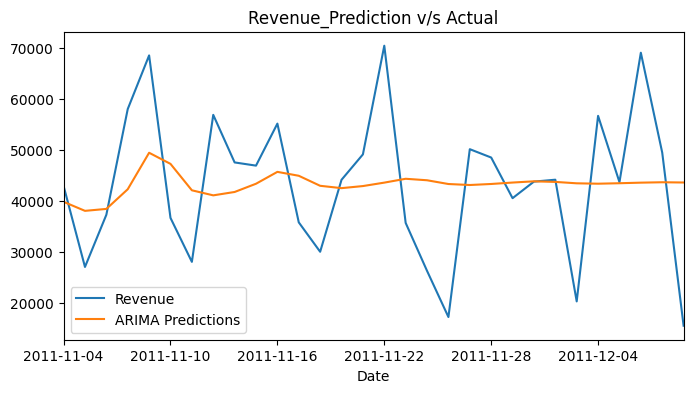

In [21]:
# Plotting predictions along with Test Set
ax = test_data['Revenue'].plot(legend=True, figsize=(8, 4), title='Revenue_Prediction v/s Actual')
Test_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#plt.savefig('ARIMA_Test_Prediction.jpg')

In [22]:
#RMSE for Predictions vs Actual
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data['Revenue'], Test_predictions))
print(rmse)

13867.496707606639


In [23]:
test_data['Revenue'].mean()

43165.46433333333

##### **Future Predictions**

In [24]:
#prediction for next 30 days
index_future_dates = pd.date_range(start='2011-12-10', end='2012-01-09') # Explicitly set timezone
#print(index_future_dates)
pred = model.predict(start=len(daily_revenue_stationary), end=len(daily_revenue_stationary)+30, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
#print(pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


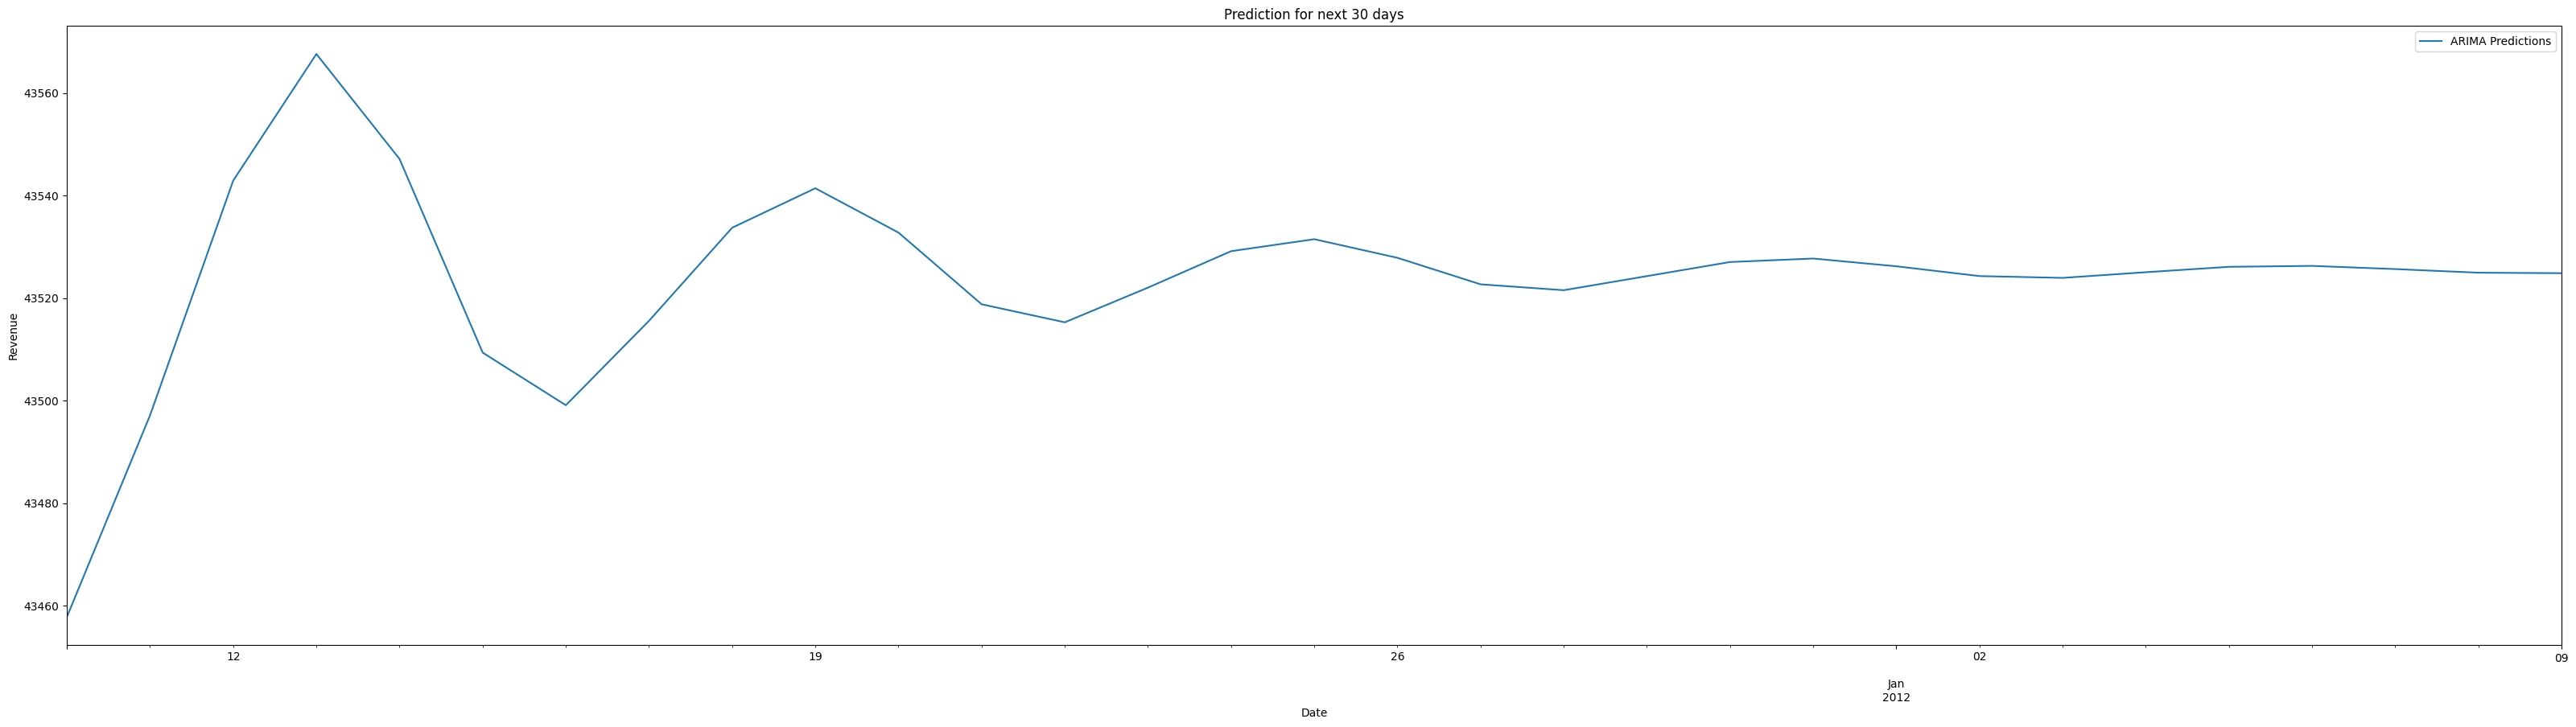

In [25]:
#pred plot

import matplotlib.pyplot as plt
pred.plot(figsize=(40,10),legend=True)
plt.title('Prediction for next 30 days')
plt.xlabel('Date')
plt.ylabel('Revenue')
#plt.savefig('ARIMA_30D_Prediction.jpg')
plt.show()


In [26]:
# convert pred to df

import pandas as pd
pred_df = pd.DataFrame(pred)
pred_df.index.name = 'Date'
pred_df.head()

,ARIMA Predictions
Date,
2011-12-10,43457.833774
2011-12-11,43497.166971
2011-12-12,43542.933552
2011-12-13,43567.613593
2011-12-14,43547.134056


In [27]:
# concat pred_df to daily revenue stationary  df based on date
arima_pred_data = pd.concat([daily_revenue_stationary, pred_df])
arima_pred_data.tail()


,Revenue,Revenue First Difference,ARIMA Predictions
Date,,,
2012-01-05 00:00:00,NaN,NaN,43526.108596
2012-01-06 00:00:00,NaN,NaN,43526.290145
2012-01-07 00:00:00,NaN,NaN,43525.666710
2012-01-08 00:00:00,NaN,NaN,43524.962308
2012-01-09 00:00:00,NaN,NaN,43524.866221


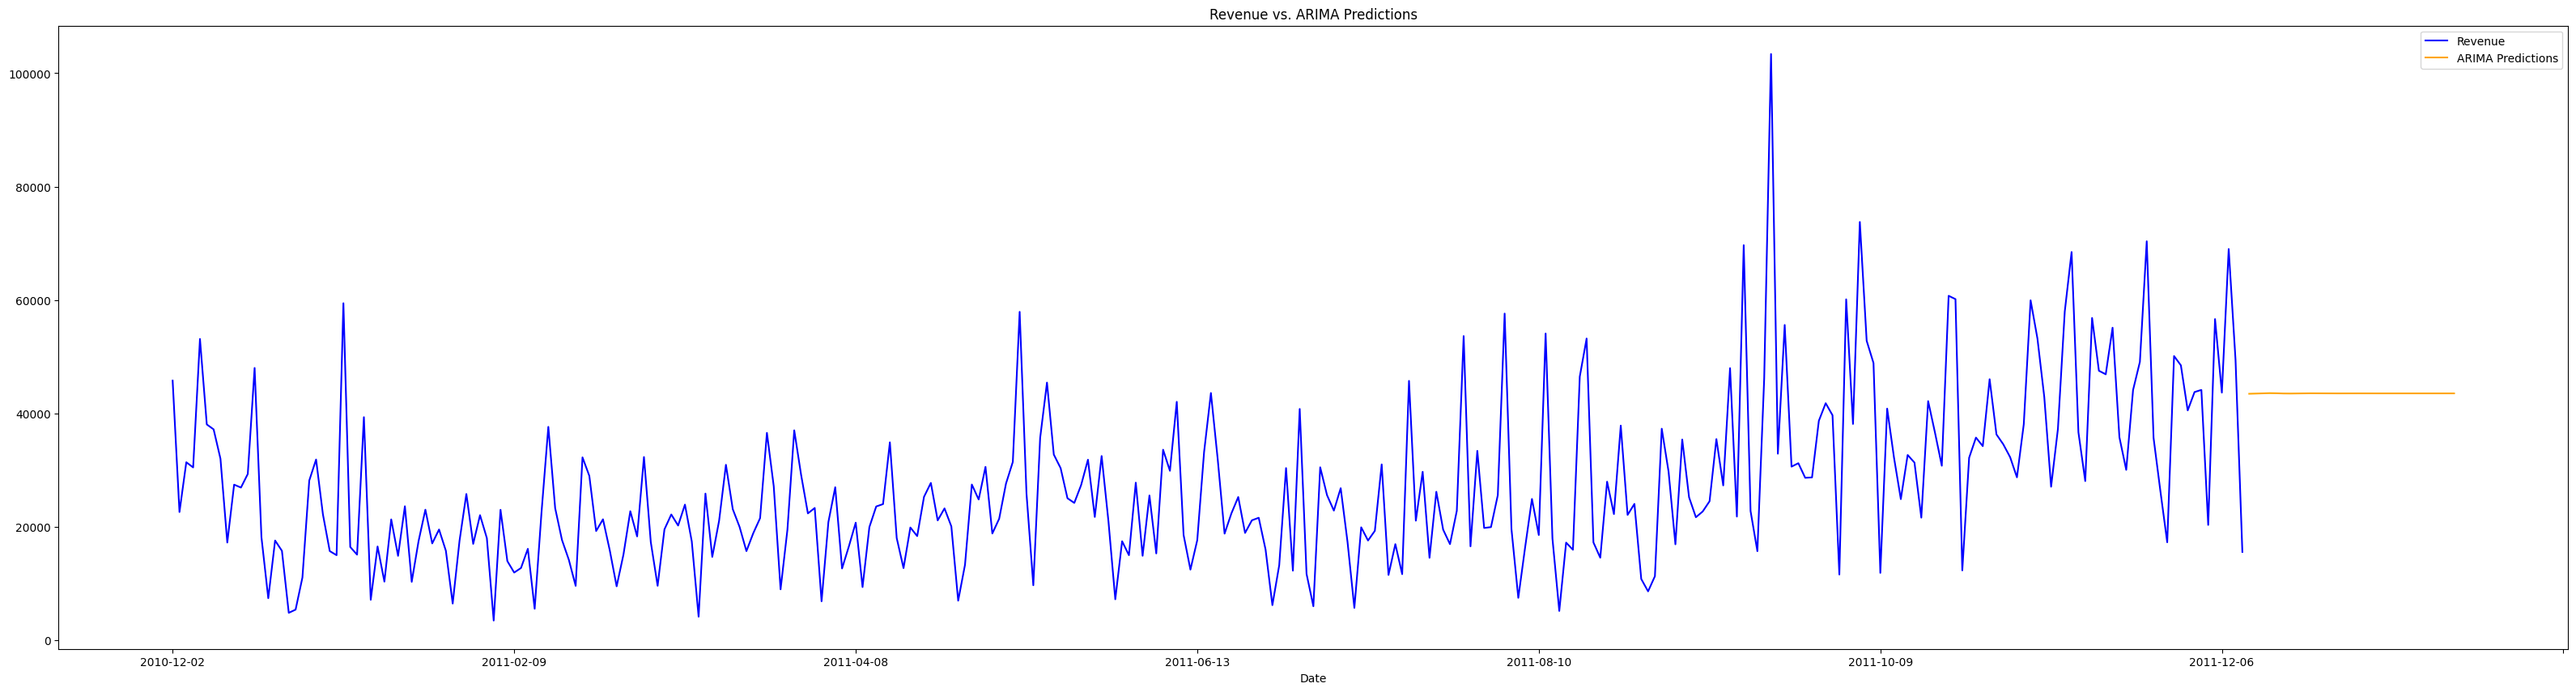

In [28]:
#line plot for revenue and Arima predictions with diff colors for arima_pred_data

import matplotlib.pyplot as plt

# Plot the revenue data
arima_pred_data['Revenue'].plot(figsize=(40, 10), label='Revenue', color='blue')

# Plot the ARIMA predictions
arima_pred_data['ARIMA Predictions'].plot(figsize=(40, 10), label='ARIMA Predictions', color='orange')

# Add legend and title
plt.legend()
plt.title('Revenue vs. ARIMA Predictions')
#plt.savefig('Final_ARIMA_Prediction_LinePlot.jpg')
# Show the plot
plt.show()


# **SARIMA MODEL**

In [29]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMA model
#model_sarima = SARIMAX(train_data['Revenue'], order=(5, 1, 1), seasonal_order=(1, 0, 1, 6))
model_sarima = SARIMAX(train_data['Revenue'], order=(5, 1, 1), seasonal_order=(1, 0, 1, 12))
model_sarima = model_sarima.fit()
model_sarima.summary()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                  273
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2942.096
Date:                            Thu, 11 Jul 2024   AIC                           5902.192
Time:                                    07:21:37   BIC                           5934.644
Sample:                                         0   HQIC                          5915.220
                                            - 273                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.203     -3.090      0.002      -1.027      -0.230
ar.L2         -0.5627      0.153     -3.690      0.000      -0.862      -0.264
ar.L3         -0.5231      0.113     -4.640      0.000      -0.744      -0.302
ar.L4         -0.3665      0.107     -3.411      0.001      -0.577      -0.156
ar.L5         -0.2996      0.064     -4.646      0.000      -0.426      -0.173
ma.L1         -0.1673      0.217     -0.771      0.441      -0.593       0.258
ar.S.L12       0.7600      0.229      3.326      0.001       0.312       1.208
ma.S.L12      -0.6335      0.261     -2.425      0.015      -1.145      -0.122
sigma2      1.462e+08   1.33e-09    1.1e+17      0.000    1.46e+08    1.46e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               129.44
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+32. Standard errors may be unstable.
"""

In [30]:
#making Predictions on test data
start = len(train_data)
end = len(train_data) + len(test_data) - 1
Test_predictions = model_sarima.predict(start=start, end=end, typ='levels').rename('SARIMA Predictions')
#Printing Date also
Test_predictions.index = daily_revenue_stationary.index[start:end+1]
#print(Test_predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


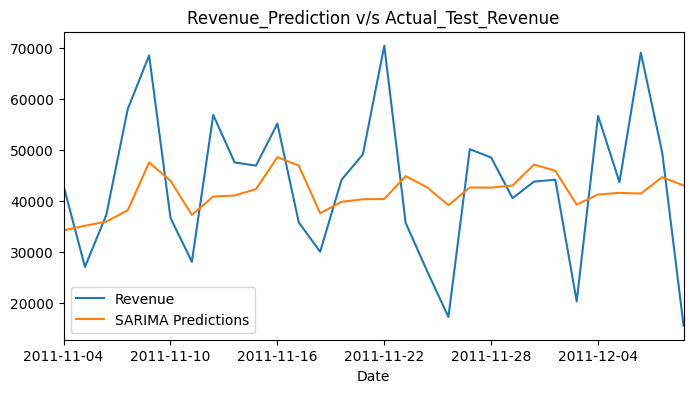

In [31]:
# Plotting predictions along with Test Set
ax = test_data['Revenue'].plot(legend=True, figsize=(8, 4), title='Revenue_Prediction v/s Actual_Test_Revenue')
Test_predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#plt.savefig('SARIMA_Test_Prediction.jpg')

In [32]:
#RMSE for Predictions vs Actual
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data['Revenue'], Test_predictions))
print(rmse)

13815.543547443156


In [33]:
#prediction for next 30 days
index_future_dates = pd.date_range(start='2011-12-10', end='2012-01-09') # Explicitly set timezone
#print(index_future_dates)
pred_s = model_sarima.predict(start=len(daily_revenue_stationary), end=len(daily_revenue_stationary)+30, typ='levels').rename('SARIMA Predictions')
pred_s.index = index_future_dates
#print(pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [34]:
# convert pred to df

import pandas as pd
pred_s_df = pd.DataFrame(pred_s)
pred_s_df.index.name = 'Date'
pred_s_df.head()

,SARIMA Predictions
Date,
2011-12-10,43181.932062
2011-12-11,43148.731692
2011-12-12,43409.096995
2011-12-13,46449.074560
2011-12-14,45555.092721


In [35]:
#data frame that contains 30 day  Arima predictions and Sarima Predictions

import pandas as pd
# Create a new DataFrame with the desired columns
arima_sarima_pred_df = pd.DataFrame(columns=['Revenue','ARIMA Predictions', 'SARIMA Predictions'])

# Add the ARIMA predictions to the DataFrame
arima_sarima_pred_df['ARIMA Predictions'] = pred.values

# Add the SARIMA predictions to the DataFrame
arima_sarima_pred_df['SARIMA Predictions'] = pred_s.values

# Set the index of the DataFrame to match the dates
arima_sarima_pred_df.index = index_future_dates

# Print the first few rows of the DataFrame
print(arima_sarima_pred_df.tail())


           Revenue  ARIMA Predictions  SARIMA Predictions
Date                                                     
2012-01-05     NaN       43526.108596        43932.065586
2012-01-06     NaN       43526.290145        45683.794829
2012-01-07     NaN       43525.666710        45167.472900
2012-01-08     NaN       43524.962308        42280.728942
2012-01-09     NaN       43524.866221        43167.544140


In [36]:
# concat pred_df to daily revenue stationary  df based on date
final_data = pd.concat([daily_revenue_stationary, arima_sarima_pred_df])
final_data.tail()


,Revenue,Revenue First Difference,ARIMA Predictions,SARIMA Predictions
Date,,,,
2012-01-05 00:00:00,NaN,NaN,43526.108596,43932.065586
2012-01-06 00:00:00,NaN,NaN,43526.290145,45683.794829
2012-01-07 00:00:00,NaN,NaN,43525.666710,45167.472900
2012-01-08 00:00:00,NaN,NaN,43524.962308,42280.728942
2012-01-09 00:00:00,NaN,NaN,43524.866221,43167.544140


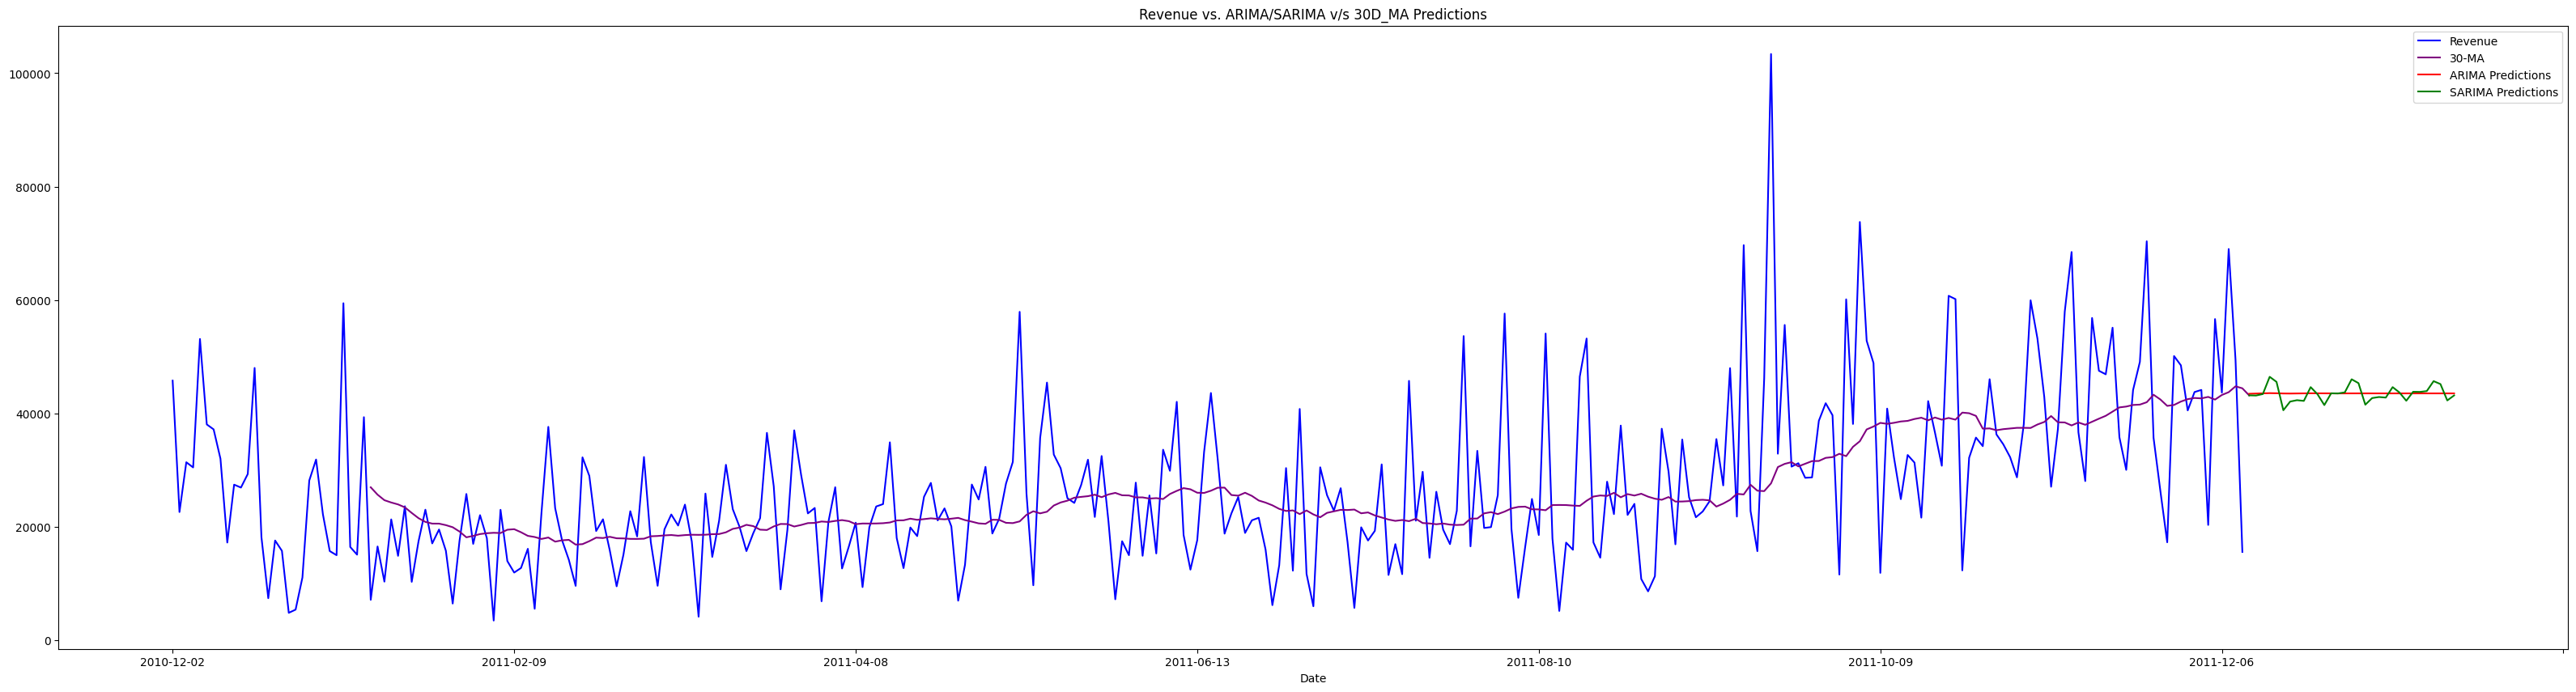

In [39]:
#line plot for revenue and Arima predictions with diff colors for arima_pred_data

import matplotlib.pyplot as plt

# Plot the revenue data
final_data['Revenue'].plot(figsize=(40, 10), label='Revenue', color='blue')

#30 Day Moving Avg
daily_revenue_ma['30-day MA'].plot(figsize=(40,10),label='30-MA',color='purple')

# Plot the ARIMA predictions
final_data['ARIMA Predictions'].plot(figsize=(40, 10), label='ARIMA Predictions', color='red')

# Plot the SARIMA predictions
final_data['SARIMA Predictions'].plot(figsize=(40, 10), label='SARIMA Predictions', color='green')

# Add legend and title
plt.legend()
plt.title('Revenue vs. ARIMA/SARIMA v/s 30D_MA Predictions')
#plt.savefig('Final_Prediction_LinePlot.jpg')
# Show the plot
plt.show()


##### **ARIMA** & **SARIMA** mainly based on Previous data and Moving Averages., If We observe the plot Clearly., **Our Predictions Strictly Following 30 Day moving Averages**

# **Random Forest Method** & **Linear Regession Method**

In [45]:
# Using the Same dataset
rf_data = daily_revenue.copy()
rf_data.head()

,Revenue
Date,
2010-12-01,46051.26
2010-12-02,45775.43
2010-12-03,22598.46
2010-12-05,31380.60
2010-12-06,30465.08


##### **For Supervised learning we need Input and Output Columns, But here we have only Input column, We need to have Output also**

for this **I am using previous 3 week sales according to our data**., **we can use last 15 days , last month any thing**

In [46]:
rf_data['sales_lastweek'] = rf_data['Revenue'].shift(7)
rf_data['sales_twoweeks_back'] = rf_data['Revenue'].shift(14)
rf_data['sales_threeweeks_back'] = rf_data['Revenue'].shift(21)
rf_data.head()

,Revenue,sales_lastweek,sales_twoweeks_back,sales_threeweeks_back
Date,,,,
2010-12-01,46051.26,NaN,NaN,NaN
2010-12-02,45775.43,NaN,NaN,NaN
2010-12-03,22598.46,NaN,NaN,NaN
2010-12-05,31380.60,NaN,NaN,NaN
2010-12-06,30465.08,NaN,NaN,NaN


Some NULL values in Columns., there is no information prior to the past data

In [47]:
#Dropping Null Values
rf_data.dropna(inplace=True)
rf_data.head()

,Revenue,sales_lastweek,sales_twoweeks_back,sales_threeweeks_back
Date,,,,
2011-01-05,28150.40,18162.42,37177.85,46051.26
2011-01-06,31863.46,7399.79,32005.35,45775.43
2011-01-07,22194.34,17574.58,17217.62,22598.46
2011-01-09,15710.80,15750.46,27429.43,31380.60
2011-01-10,14984.40,4821.12,26913.41,30465.08


##### **So here,, My Dependent Column is Revenue, and Remaining are independent columns**

In [49]:
rf_data.shape

(284, 4)

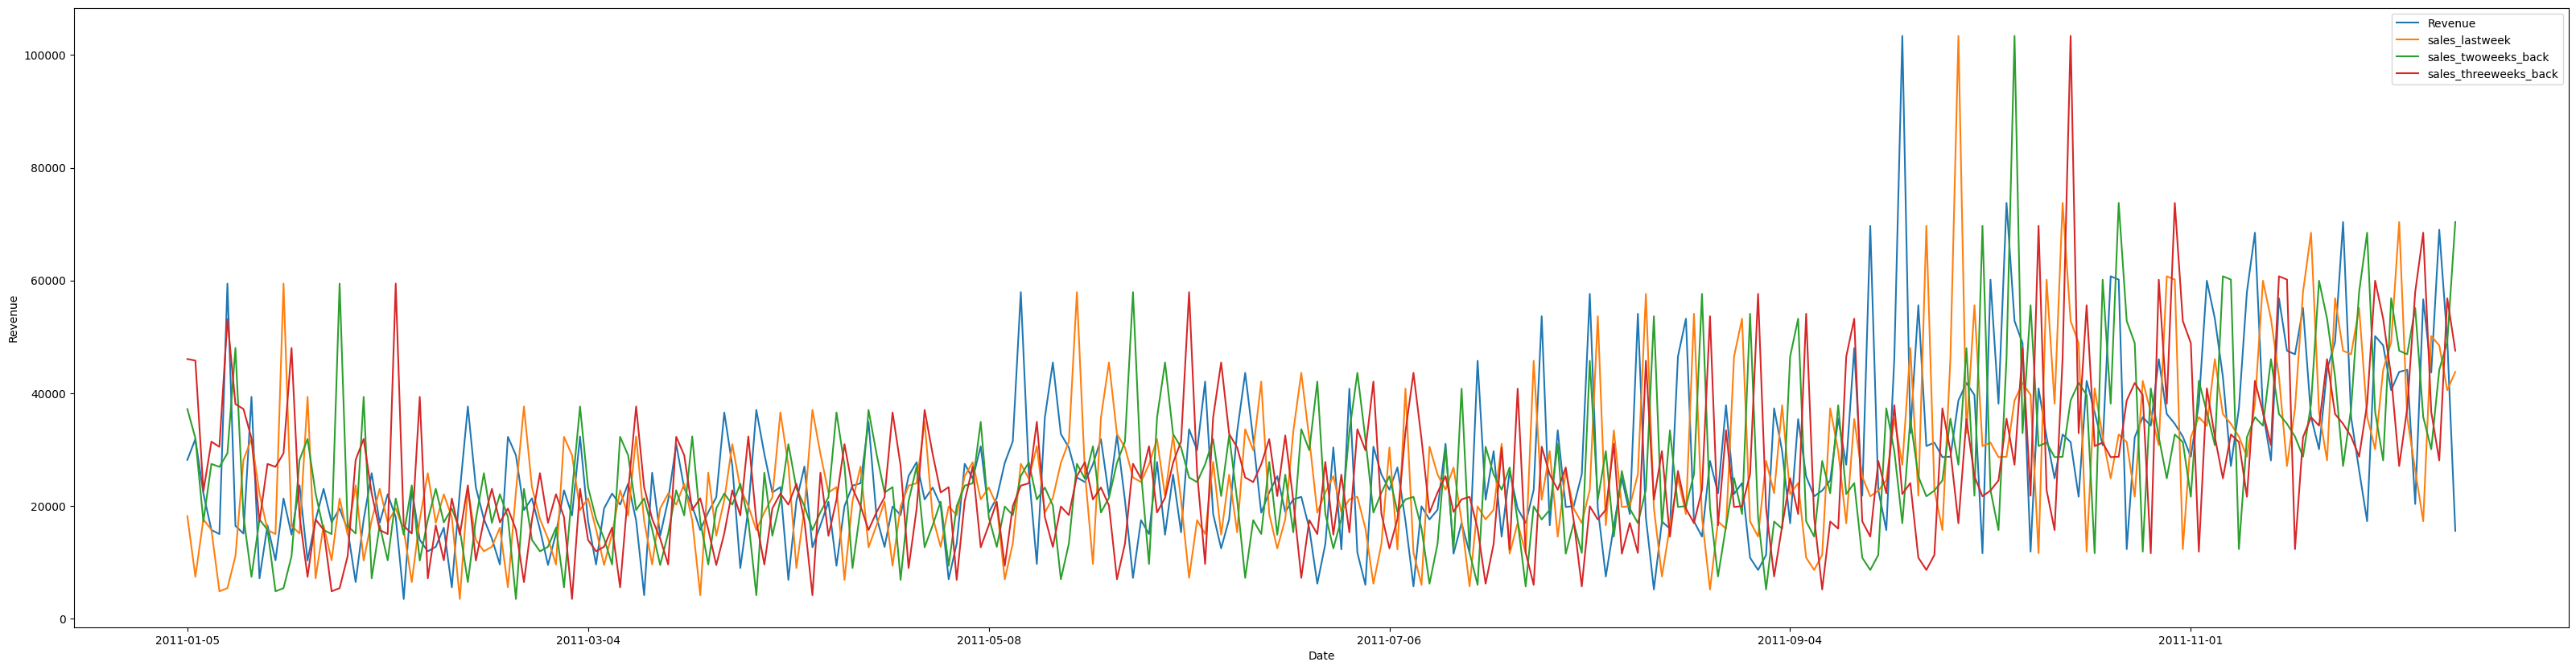

In [51]:
#line Plot for Daily revenue
rf_data.plot(figsize=(40,10))
#plt.savefig('daily_revenue_Graph.jpg')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [52]:
#My input and Output is ready., Now I can call any machine learnig algorithm(Basically regression problem) to do predictions
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
lin_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=1,max_features=3) #Estimatedly taken

In [54]:
x1,x2,x3,y = rf_data['sales_lastweek'],rf_data['sales_twoweeks_back'],rf_data['sales_threeweeks_back'],rf_data['Revenue']
x1,x2,x3,y = np.array(x1), np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)
#print(final_x)

In [55]:
# Test for last 30 days
x_train,x_test,y_train,y_test = final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [56]:
#Fitting linear model and random forest model
lin_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)

<ipython-input-56-819e00b71e1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


RandomForestRegressor(max_features=3, random_state=1)

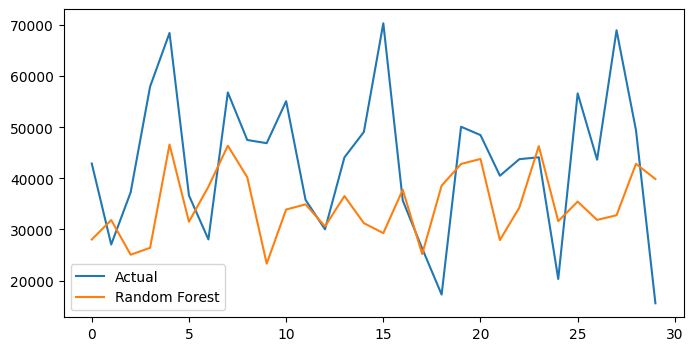

In [58]:
#Prediction on test data --- Random Forest
rf_pred = rf_model.predict(x_test)
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(y_test, label='Actual')
plt.plot(rf_pred, label='Random Forest')
plt.legend()
#plt.savefig('Random_Forest_Test_Prediction.jpg')
plt.show()

Some what its captyring the trend

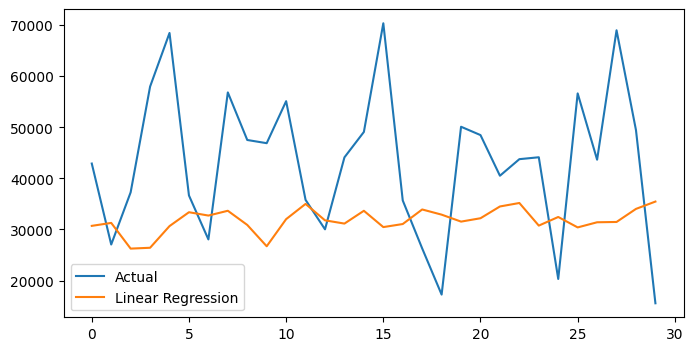

In [59]:
#Prediction on test data --- Linear Regression
lin_pred = lin_model.predict(x_test)
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(y_test, label='Actual')
plt.plot(lin_pred, label='Linear Regression')
plt.legend()
#plt.savefig('lin_regr_Test_Prediction.jpg')
plt.show()

In [63]:
#rmse for both the models

import numpy as np
#RMSE for Predictions vs Actual -- Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE for Random Forest Model: ",rmse_rf)

#RMSE for Predictions vs Actual -- Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, lin_pred))
print("RMSE for Linear Regression Model: ",rmse_lr)


RMSE for Random Forest Model:  17006.640057461955
RMSE for Linear Regression Model:  18925.79656029098


##### **RMSE for Random Forest is better** , RMSE follwing the Trend